Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from plotly.offline import init_notebook_mode,iplot
import matplotlib as mpl
import matplotlib.pyplot as plt
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

Import the Dataset

In [3]:
df = pd.read_excel('/content/Rotten_Tomatoes_Movies3.xls')

First 5 rows

In [4]:
df.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


Last 5 Rows

In [5]:
df.tail(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0


Rows and Columns

In [6]:
df.shape

(16638, 16)

Info about the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

Description about the Dataset

In [8]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


Data Cleaning

Check for Null values

In [9]:
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [10]:
df.isnull().sum().sum()

11757

Removal of all Null values

In [12]:
df['movie_info'] = df['movie_info'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['critics_consensus'] = df['critics_consensus'].fillna('No Review')
df['directors'] = df['directors'].fillna(df['directors'].mode()[0])
df['writers'] = df['writers'].fillna('Unknown')
df['runtime_in_minutes'] = df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].mean())
df['audience_rating'] = df['audience_rating'].fillna(df['audience_rating'].median())
df['in_theaters_date'] = df['in_theaters_date'].ffill()
df['on_streaming_date'] = df['on_streaming_date'].bfill()
df['studio_name'] = df['studio_name'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [13]:
df.isnull().sum().sum()

0

Check for Duplicate values

In [18]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Distribution of Studio Names

Max Count: 497 for Paramount Pictures


Text(0.5, 1.0, 'Distribution of Studio names')

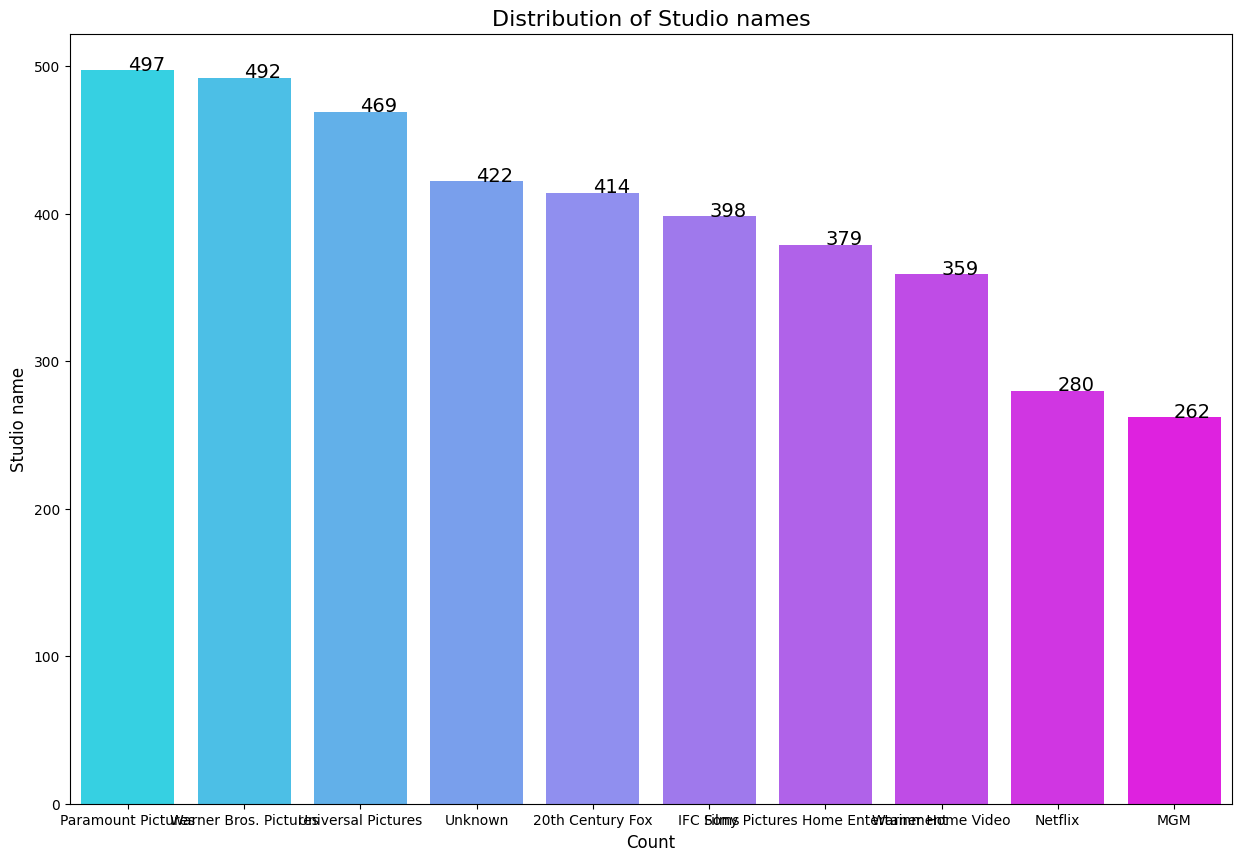

In [27]:
a = plt.cm.cool

plt.figure(figsize=(15,10))
count = df['studio_name'].value_counts()[:10]
sns.barplot(x=count.index, y=count.values, hue=count.index, palette=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)], legend=False)
for i, v in enumerate(count.values):
    plt.text(i, v, str(v), color='k', fontsize=14)
max_count = count.max()
max_count_index = count.idxmax()  # To get the index of the maximum count
print(f"Max Count: {max_count} for {max_count_index}")
plt.xlabel('Count', fontsize=12)
plt.ylabel('Studio name', fontsize=12)
plt.title('Distribution of Studio names',fontsize=16)

Distribution of Genres

Most watched Genre is Comedy with a count of 3540


Text(0.5, 1.0, 'Distribution of Genres')

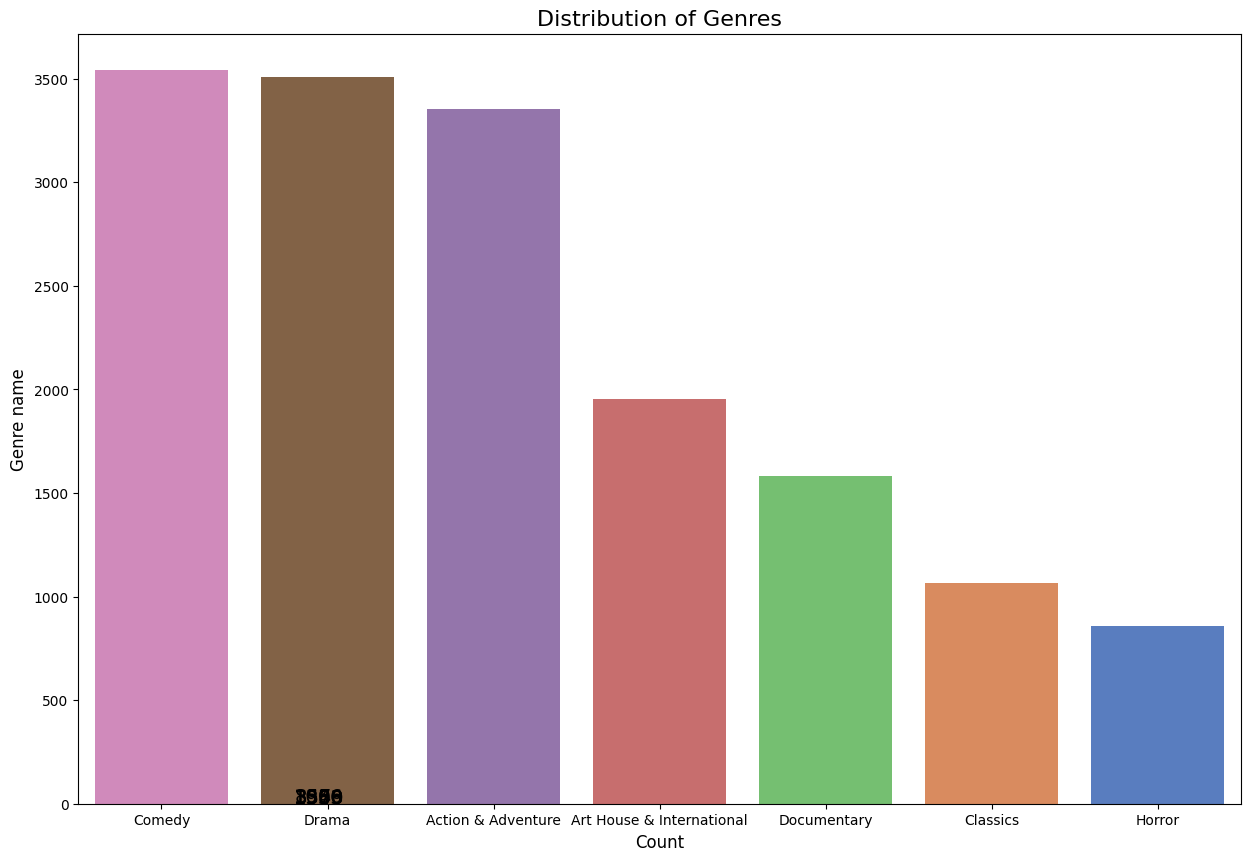

In [32]:
df['first_genre'] = df['genre'].str.split(',').str[0]

a = plt.cm.cool

plt.figure(figsize=(15,10))
count = df['first_genre'].value_counts()[:7]
sns.barplot(x=count.index, y=count.values,hue=count.values, palette="muted",legend = False)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
max_count = count.max()
max_count_index = count.idxmax()
print(f"Most watched Genre is {max_count_index} with a count of {max_count}")
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Distribution of Genres", fontsize=16)

Tomatometer Rating per Genre

The genre with the highest TomatoMeter rating is 'Documentary' with a rating of 81.02.


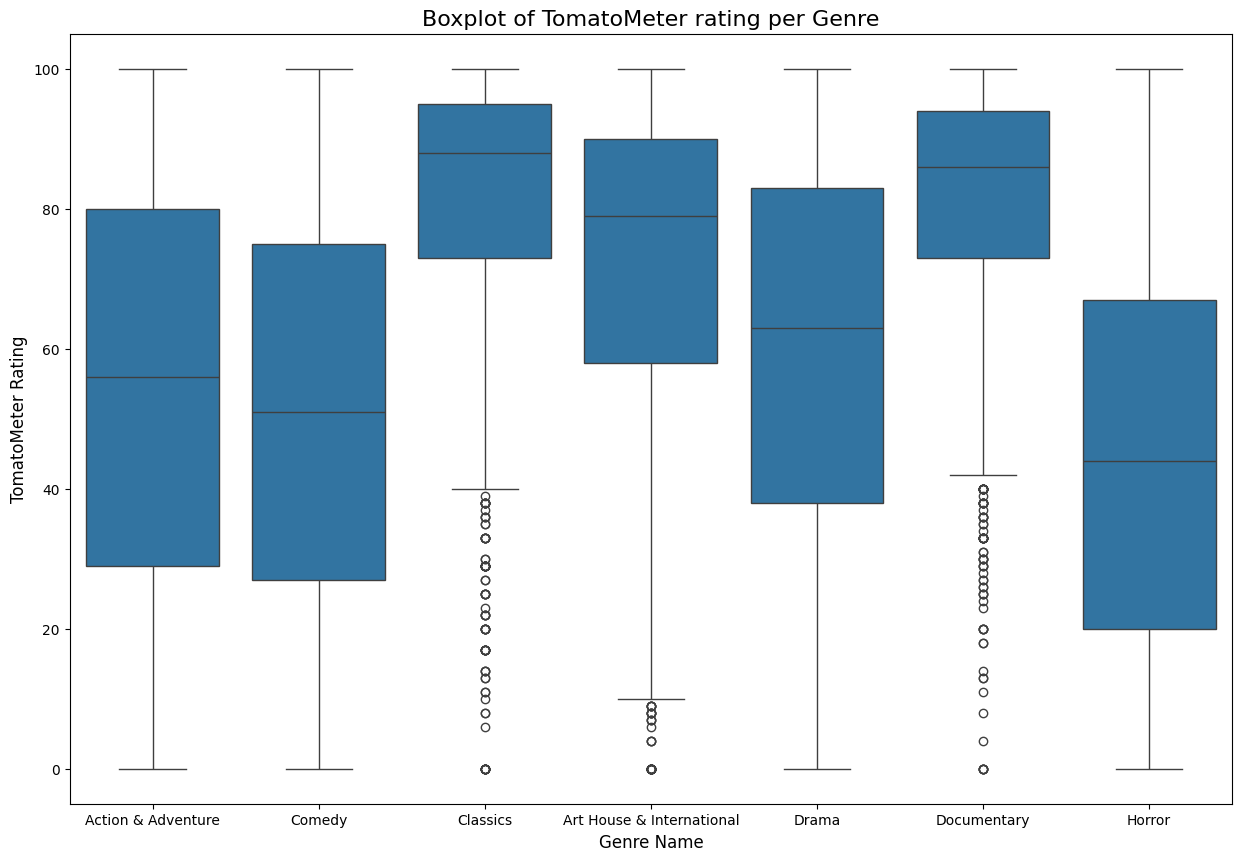

In [35]:
top_genres = list(count.index)
movie_genres_df = df[df['first_genre'].isin(top_genres)]
movie_genres_df = movie_genres_df[pd.notnull(movie_genres_df[['first_genre', 'tomatometer_rating', 'tomatometer_status', 'tomatometer_count',
                                                              'audience_rating']])]
genre_ratings = movie_genres_df.groupby('first_genre')['tomatometer_rating'].mean()
max_genre = genre_ratings.idxmax()
max_rating = genre_ratings.max()
print(f"The genre with the highest TomatoMeter rating is '{max_genre}' with a rating of {max_rating:.2f}.")
plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='tomatometer_rating', data=movie_genres_df)
plt.xlabel("Genre Name",fontsize=12)
plt.ylabel("TomatoMeter Rating",fontsize=12)
plt.title("Boxplot of TomatoMeter rating per Genre", fontsize=16)
plt.show()

Audience Rating per Genre

The genre with the highest Audience rating is 'Documentary' with a rating of 73.42.


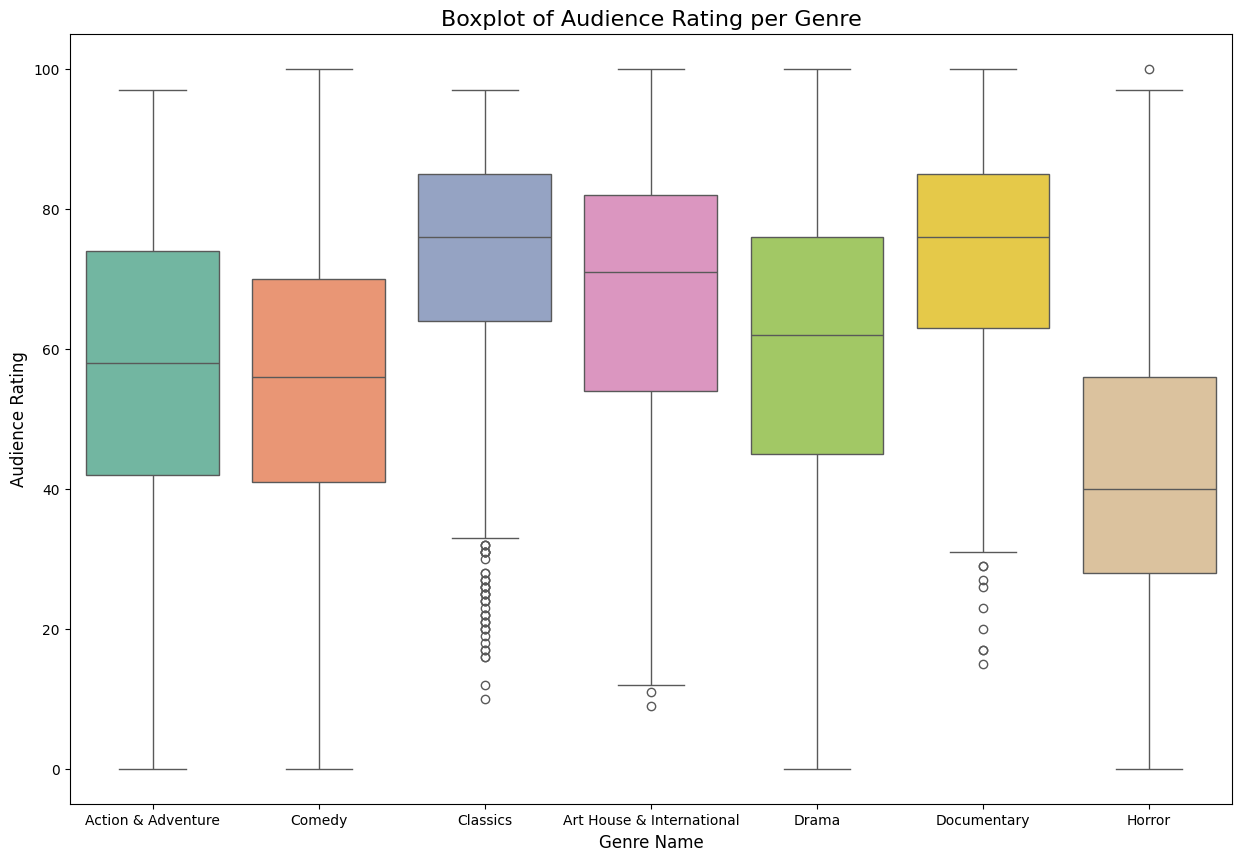

In [42]:
genre_ratings = movie_genres_df.groupby('first_genre')['audience_rating'].mean()
max_genre = genre_ratings.idxmax()
max_rating = genre_ratings.max()
print(f"The genre with the highest Audience rating is '{max_genre}' with a rating of {max_rating:.2f}.")
custom_palette = sns.color_palette("Set2", n_colors=7)
plt.figure(figsize=(15, 10))
sns.boxplot(x='first_genre', y='audience_rating',hue='first_genre', data=movie_genres_df,
            palette=custom_palette)  # Use the custom color palette
plt.xlabel("Genre Name", fontsize=12)
plt.ylabel("Audience Rating", fontsize=12)
plt.title("Boxplot of Audience Rating per Genre", fontsize=16)
plt.show()

Crosstab of genres and TomatoMeter

In [43]:
genre_rating_tomatometer = pd.crosstab(movie_genres_df.first_genre, movie_genres_df.tomatometer_status, margins=True)
genre_rating_tomatometer.style.background_gradient(cmap='summer_r')

tomatometer_status,Certified Fresh,Fresh,Rotten,All
first_genre,,,,
Action & Adventure,512,1054,1787,3353
Art House & International,456,996,504,1956
Classics,122,790,154,1066
Comedy,525,970,2045,3540
Documentary,372,1021,190,1583
Drama,753,1155,1601,3509
Horror,63,233,561,857
All,2803,6219,6842,15864


Genre Popularity: Action & Adventure, Comedy, and Drama

Critical Reception: Documentaries are well-received, Horror and Comedy is not.

Catplots of Genres and TomatoMeter

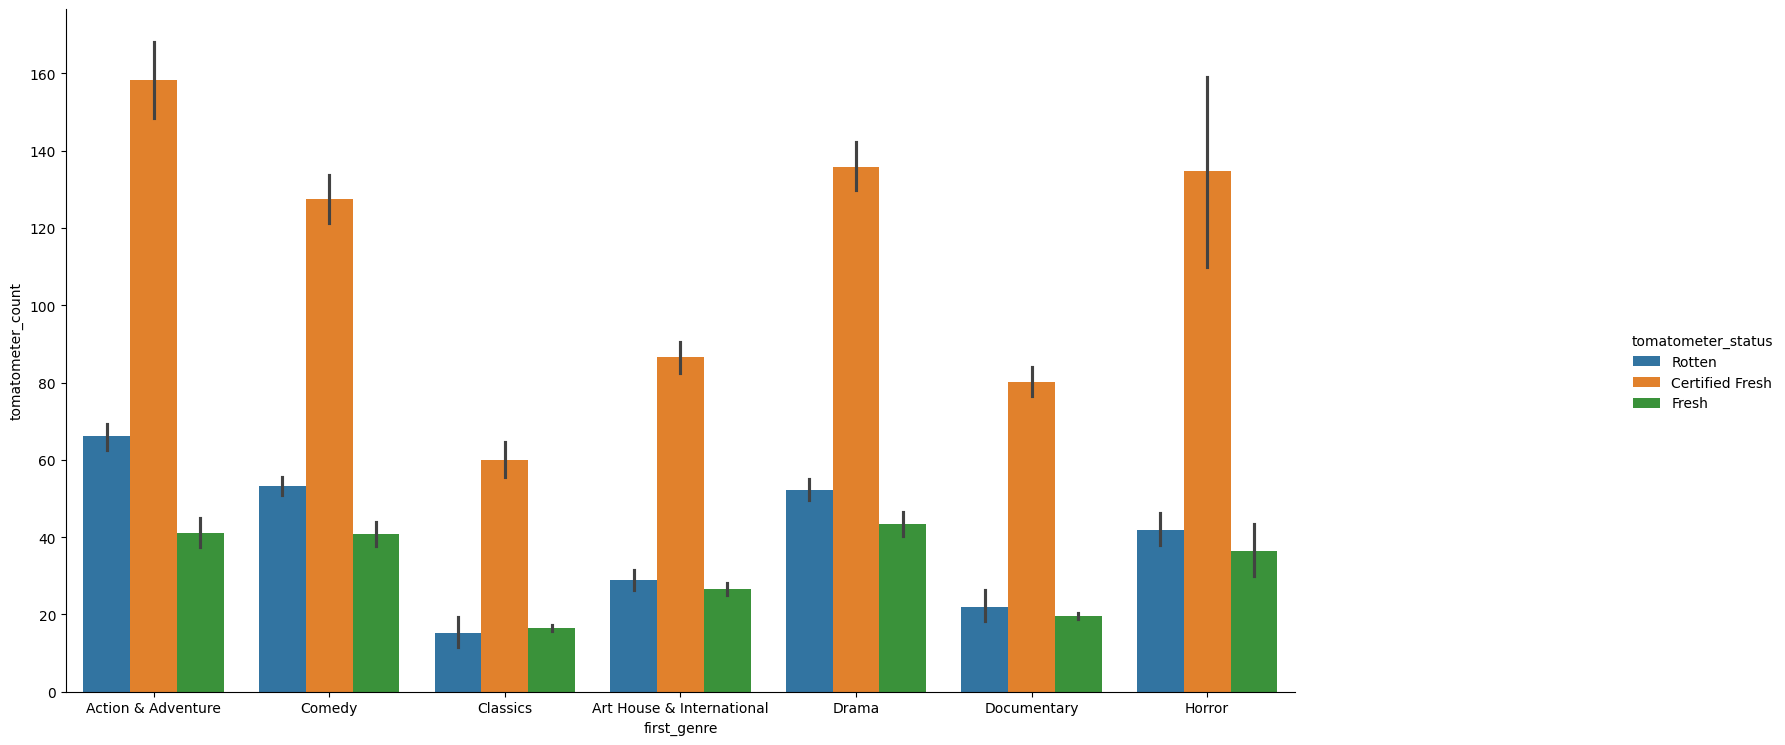

In [46]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot(x='first_genre', y='tomatometer_count', hue='tomatometer_status', data=movie_genres_df, kind='bar')
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

Action & Adventure - Certified Fresh Category.
Drama genre - Fresh Category.
Action & Adventure genre - Rotten Category.



WORD CLOUD GENERATION

In [48]:
stopwords = set(STOPWORDS)

def topicWordCloud(subset):
    wordcloud = WordCloud(width=1800, height=1200,
                      background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      min_font_size=20,
                      random_state=42).generate(str(subset))
    return wordcloud

Word clouds of critic contents based on movie genre

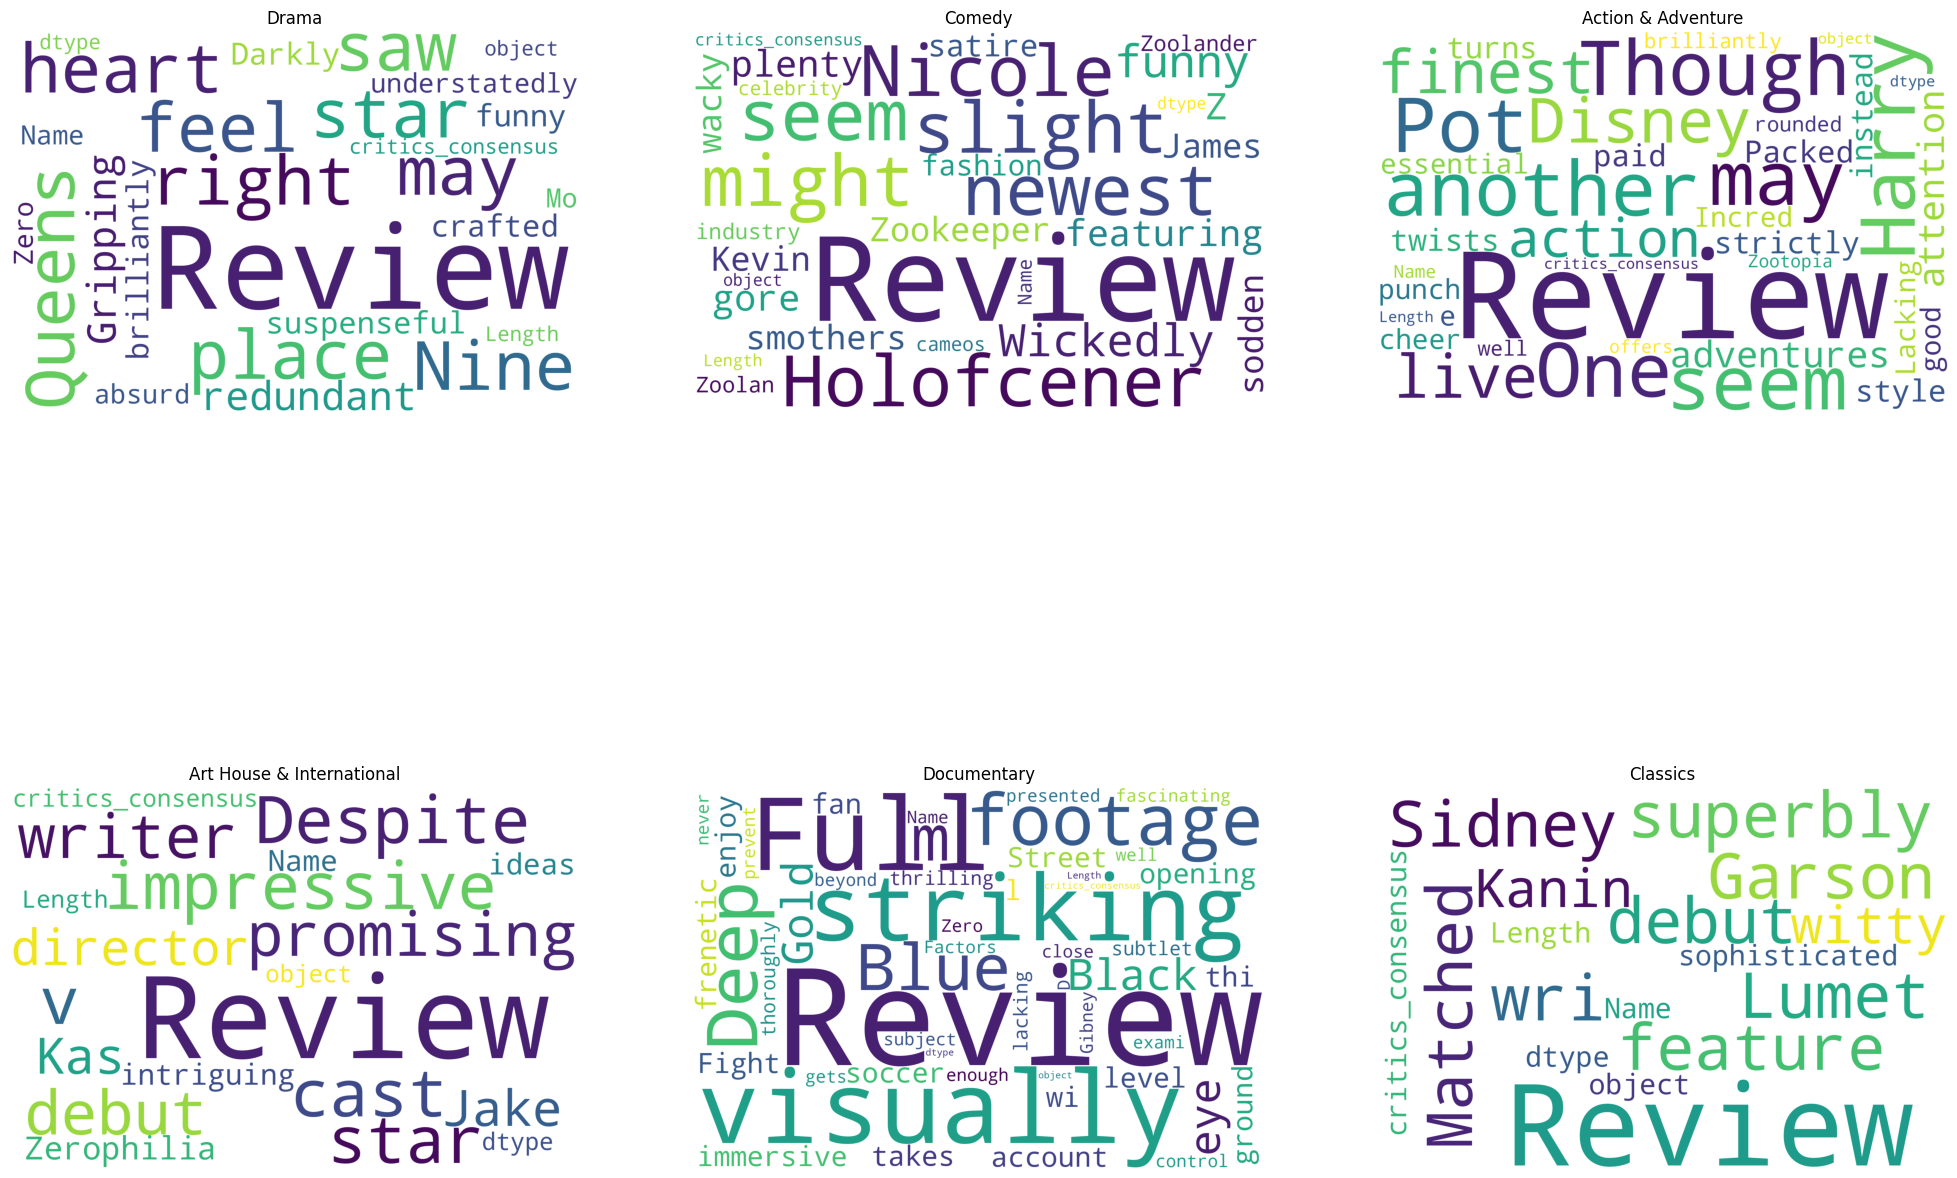

In [49]:
genres_list = ['Drama', 'Comedy', 'Action & Adventure', 'Art House & International', 'Documentary', 'Classics']

fig = plt.figure(figsize=(25, 18), facecolor=None)
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    subset = df[df['first_genre'] == genres_list[i]]['critics_consensus']
    plot_title = genres_list[i]
    wordcloud = topicWordCloud(subset)
    plt.title(plot_title)
    ax.imshow(wordcloud)
    ax.axis('off')

In all the categories - Review is the most used.